# Capstone Project - Beating the Moneyline - Utilizing Supervised Machine Learning to Predict MLB Game Outcomes. 

## 

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [2]:
atl_wins_df = pd.read_csv('csv_files/atl_wins.csv')
team_stats_df = pd.read_csv('csv_files/team_stats.csv')
batting_stats_df = pd.read_csv('csv_files/batting_stats.csv') 
sp_stats_df = pd.read_csv('csv_files/sp_stats.csv')

In [3]:
sp_stats_df.head()

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR,playerid
0,Gerrit Cole,Astros,20,5,0,33,33,212.1,13.82,2.03,1.23,0.275,83.3%,40.3%,16.9%,2.50,2.64,2.48,7.4,13125
1,Jacob deGrom,Mets,11,8,0,32,32,204.0,11.25,1.94,0.84,0.282,81.8%,44.4%,11.2%,2.43,2.67,3.11,7.0,10954
2,Lance Lynn,Rangers,16,11,0,33,33,208.1,10.63,2.55,0.91,0.322,74.4%,40.3%,9.9%,3.67,3.13,3.85,6.8,2520
3,Max Scherzer,Nationals,11,7,0,27,27,172.1,12.69,1.72,0.94,0.321,78.7%,40.8%,11.6%,2.92,2.45,2.88,6.5,3137
4,Justin Verlander,Astros,21,6,0,34,34,223.0,12.11,1.70,1.45,0.218,88.4%,35.9%,16.0%,2.58,3.27,3.18,6.4,8700


In [4]:
sp_stats_df.corr()

,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,ERA,FIP,xFIP,WAR,playerid
W,1.000000,0.645369,NaN,0.892394,0.892394,0.926055,0.128264,-0.178127,-0.157821,-0.168759,-0.212056,-0.245129,-0.247012,0.854639,-0.204371
L,0.645369,1.000000,NaN,0.854855,0.854855,0.834478,0.016153,-0.175463,-0.097377,-0.119223,-0.175713,-0.178761,-0.191926,0.519866,-0.157495
SV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,0.892394,0.854855,NaN,1.000000,1.000000,0.984921,0.117231,-0.213440,-0.162899,-0.184550,-0.244349,-0.267251,-0.274731,0.778819,-0.197564
GS,0.892394,0.854855,NaN,1.000000,1.000000,0.984921,0.117231,-0.213440,-0.162899,-0.184550,-0.244349,-0.267251,-0.274731,0.778819,-0.197564
IP,0.926055,0.834478,NaN,0.984921,0.984921,1.000000,0.111333,-0.208566,-0.160721,-0.184109,-0.237838,-0.261609,-0.268155,0.829339,-0.194578
K/9,0.128264,0.016153,NaN,0.117231,0.117231,0.111333,1.000000,-0.119181,-0.172663,0.247946,-0.122489,-0.336133,-0.448324,0.240553,0.006019
BB/9,-0.178127,-0.175463,NaN,-0.213440,-0.213440,-0.208566,-0.119181,1.000000,0.052791,0.377381,0.609086,0.616923,0.865470,-0.166082,0.111006
HR/9,-0.157821,-0.097377,NaN,-0.162899,-0.162899,-0.160721,-0.172663,0.052791,1.000000,0.179682,0.511803,0.799696,0.314505,-0.206354,-0.039933
BABIP,-0.168759,-0.119223,NaN,-0.184550,-0.184550,-0.184109,0.247946,0.377381,0.179682,1.000000,0.589187,0.343962,0.324799,-0.137284,0.043988


In [5]:
df_atl = atl_wins_df[['Date', 'W/L', 'Win', 'Loss', 'R', 'RA']]

In [6]:
df_atl.head()

,Date,W/L,Win,Loss,R,RA
0,Thursday Mar 28,L,Nola,Teheran,4,10
1,Saturday Mar 30,L,Morgan,Parsons,6,8
2,Sunday Mar 31,L,Arrieta,Wright,1,5
3,Monday Apr 1,W,Parsons,Hendricks,8,0
4,Wednesday Apr 3,W,Jackson,Cishek,6,4


In [8]:
df_atl_wp= df_atl[['Win']]

In [9]:
df_atl_lp= df_atl[['Loss']]

In [13]:
season_df=pd.read_csv('csv_files/braves_season1.csv'
                    )

In [14]:
season_df.head()

,Rk,Gtm,Date,Unnamed: 3,Opp,Rslt,PA,AB,R,H,...,SB,CS,BA,OBP,SLG,OPS,LOB,#,Thr,Opp. Starter (GmeSc)
0,1,1,Mar 28,@,PHI,L4-10,36,30,4,7,...,1,1,0.233,0.361,0.367,0.728,5,15,R,A.Nola(67)
1,2,2,Mar 30,@,PHI,L6-8,40,36,6,10,...,1,0,0.258,0.355,0.470,0.825,7,17,R,N.Pivetta(35)
2,3,3,Mar 31,@,PHI,L1-5,36,29,1,4,...,1,2,0.221,0.339,0.368,0.708,8,14,R,J.Arrieta(62)
3,4,4,Apr 1,NaN,CHC,W8-0,43,36,8,12,...,0,0,0.252,0.368,0.427,0.795,11,15,R,K.Hendricks(26)
4,5,5,Apr 3,NaN,CHC,W6-4,39,30,6,8,...,1,0,0.255,0.376,0.441,0.817,9,16,L,J.Lester(56)


In [15]:
df_atl

,Date,W/L,Win,Loss,R,RA
0,Thursday Mar 28,L,Nola,Teheran,4,10
1,Saturday Mar 30,L,Morgan,Parsons,6,8
2,Sunday Mar 31,L,Arrieta,Wright,1,5
3,Monday Apr 1,W,Parsons,Hendricks,8,0
4,Wednesday Apr 3,W,Jackson,Cishek,6,4
...,...,...,...,...,...,...
157,Tuesday Sep 24,L,Duffy,Teheran,6,9
158,Wednesday Sep 25,W,Jackson,Barnes,10,2
159,Friday Sep 27,L,Stroman,Keuchel,2,4
160,Saturday Sep 28,L,Matz,Foltynewicz,0,3


In [18]:
season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 32 columns):
Rk                      162 non-null int64
Gtm                     162 non-null int64
Date                    162 non-null object
Unnamed: 3              81 non-null object
Opp                     162 non-null object
Rslt                    162 non-null object
PA                      162 non-null int64
AB                      162 non-null int64
R                       162 non-null int64
H                       162 non-null int64
2B                      162 non-null int64
3B                      162 non-null int64
HR                      162 non-null int64
RBI                     162 non-null int64
BB                      162 non-null int64
IBB                     162 non-null int64
SO                      162 non-null int64
HBP                     162 non-null int64
SH                      162 non-null int64
SF                      162 non-null int64
ROE                     162 non-

In [19]:
print(season_df.isnull().sum(axis=0))

Rk                       0
Gtm                      0
Date                     0
Unnamed: 3              81
Opp                      0
Rslt                     0
PA                       0
AB                       0
R                        0
H                        0
2B                       0
3B                       0
HR                       0
RBI                      0
BB                       0
IBB                      0
SO                       0
HBP                      0
SH                       0
SF                       0
ROE                      0
GDP                      0
SB                       0
CS                       0
BA                       0
OBP                      0
SLG                      0
OPS                      0
LOB                      0
#                        0
Thr                      0
Opp. Starter (GmeSc)     0
dtype: int64


In [20]:
season_df[['Rslt']] = season_df['Rslt'].str.slice(stop=1)

In [21]:
season_df[['Rslt']] = season_df['Rslt'].map({'W':1, 'L':0})

In [22]:
data_df = season_df.drop(['Rk', 'CS', 'HBP', 'Gtm', 'OBP', 'SF', 'SH', '#', 'Unnamed: 3', 'GDP', 'LOB', 'Thr'], axis=1)

In [23]:
data_df.head()

,Date,Opp,Rslt,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,ROE,SB,BA,SLG,OPS,Opp. Starter (GmeSc)
0,Mar 28,PHI,0,36,30,4,7,1,0,1,4,6,0,9,0,1,0.233,0.367,0.728,A.Nola(67)
1,Mar 30,PHI,0,40,36,6,10,2,1,2,6,4,0,9,0,1,0.258,0.470,0.825,N.Pivetta(35)
2,Mar 31,PHI,0,36,29,1,4,0,0,0,0,6,0,8,0,1,0.221,0.368,0.708,J.Arrieta(62)
3,Apr 1,CHC,1,43,36,8,12,3,0,2,6,7,1,9,2,0,0.252,0.427,0.795,K.Hendricks(26)
4,Apr 3,CHC,1,39,30,6,8,1,0,2,6,8,0,8,0,1,0.255,0.441,0.817,J.Lester(56)


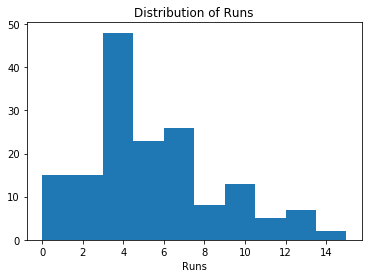

Mean Runs/Game: 5.277777777777778


In [24]:
plt.hist(data_df['R'])
plt.xlabel('Runs')
plt.title('Distribution of Runs')
plt.show()
print('Mean Runs/Game:', data_df['R'].mean())

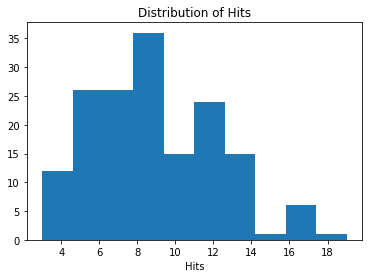

Mean Hits/Game: 5.277777777777778


In [25]:
plt.hist(data_df['H'])
plt.xlabel('Hits')
plt.title('Distribution of Hits')
plt.show()
print('Mean Hits/Game:', data_df['R'].mean())

In [26]:
data_df.corr()

,Rslt,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,ROE,SB,BA,SLG,OPS
Rslt,1.000000,0.269803,0.129982,0.548318,0.355936,0.205820,0.083166,0.289796,0.535478,0.308701,0.140351,-0.162777,0.173768,-0.116501,0.127391,0.121474,0.094293
PA,0.269803,1.000000,0.877000,0.599209,0.709785,0.383936,0.100949,0.169528,0.589614,0.514122,0.291550,0.233981,0.173255,0.129518,0.100660,0.043841,0.070843
AB,0.129982,0.877000,1.000000,0.484857,0.733373,0.329213,0.078892,0.199611,0.484252,0.078508,0.136570,0.258234,0.130584,0.114511,0.170863,0.090321,0.052761
R,0.548318,0.599209,0.484857,1.000000,0.774343,0.455147,0.072365,0.544756,0.991613,0.372915,0.092160,-0.103059,0.207447,-0.081354,0.182873,0.131024,0.142919
H,0.355936,0.709785,0.733373,0.774343,1.000000,0.495860,0.083361,0.335609,0.775630,0.148335,0.149712,-0.106716,0.089679,-0.051979,0.244993,0.125503,0.165119
2B,0.205820,0.383936,0.329213,0.455147,0.495860,1.000000,0.061796,0.061013,0.455415,0.166559,0.209596,-0.138127,0.020772,-0.072087,0.180913,0.157425,0.170603
3B,0.083166,0.100949,0.078892,0.072365,0.083361,0.061796,1.000000,-0.096584,0.072967,0.058190,-0.060465,0.138994,-0.003269,0.052943,-0.022348,-0.027855,-0.011065
HR,0.289796,0.169528,0.199611,0.544756,0.335609,0.061013,-0.096584,1.000000,0.550873,0.055115,-0.150084,0.011970,0.146143,-0.078356,0.141024,0.183808,0.128324
RBI,0.535478,0.589614,0.484252,0.991613,0.775630,0.455415,0.072967,0.550873,1.000000,0.352128,0.077828,-0.101397,0.178852,-0.084513,0.208056,0.150449,0.157150
BB,0.308701,0.514122,0.078508,0.372915,0.148335,0.166559,0.058190,0.055115,0.352128,1.000000,0.341167,0.038716,0.120792,0.078883,-0.107064,-0.040248,0.065922


In [27]:
def assign_bins_Hits(H): 
    if H <4 :
        return 1
    if H >= 4: 
        return 2
    if H >= 6:
        return 3
    if H >= 8:
        return 4
    if H >= 10: 
        return 5
    if H >= 12: 
        return 6
    if H >= 14: 
        return 7
    
data_df['hit_bins'] = data_df['H'].apply(assign_bins_Hits)

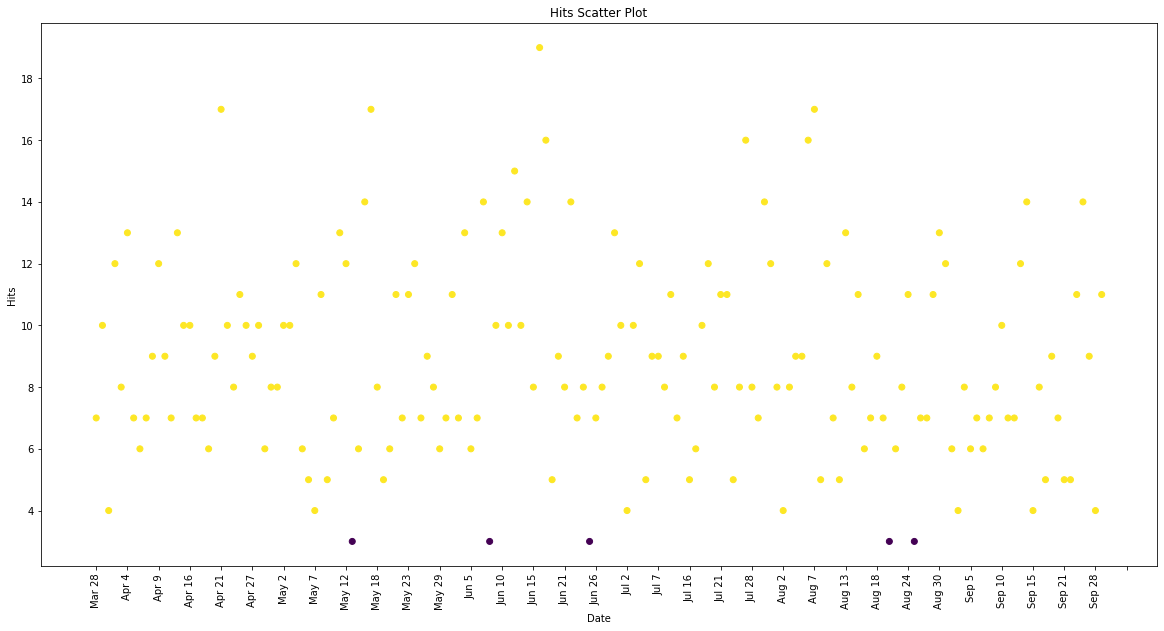

In [28]:
plt.rcParams["figure.figsize"]=20,10
x_ticks = np.arange(0, 250, 5)
plt.xticks(x_ticks)
plt.xticks(rotation=90)
plt.scatter(data_df['Date'], data_df['H'], c=data_df['hit_bins'])
plt.title('Hits Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Hits')
plt.show()

In [29]:
data_df[['Date']] = data_df['Date'].str.slice(stop=3)

In [30]:
data_df.head()

,Date,Opp,Rslt,PA,AB,R,H,2B,3B,HR,...,BB,IBB,SO,ROE,SB,BA,SLG,OPS,Opp. Starter (GmeSc),hit_bins
0,Mar,PHI,0,36,30,4,7,1,0,1,...,6,0,9,0,1,0.233,0.367,0.728,A.Nola(67),2
1,Mar,PHI,0,40,36,6,10,2,1,2,...,4,0,9,0,1,0.258,0.470,0.825,N.Pivetta(35),2
2,Mar,PHI,0,36,29,1,4,0,0,0,...,6,0,8,0,1,0.221,0.368,0.708,J.Arrieta(62),2
3,Apr,CHC,1,43,36,8,12,3,0,2,...,7,1,9,2,0,0.252,0.427,0.795,K.Hendricks(26),2
4,Apr,CHC,1,39,30,6,8,1,0,2,...,8,0,8,0,1,0.255,0.441,0.817,J.Lester(56),2


In [31]:
winning_df = data_df[data_df.Rslt != 0]


In [32]:
winning_df.head()


,Date,Opp,Rslt,PA,AB,R,H,2B,3B,HR,...,BB,IBB,SO,ROE,SB,BA,SLG,OPS,Opp. Starter (GmeSc),hit_bins
3,Apr,CHC,1,43,36,8,12,3,0,2,...,7,1,9,2,0,0.252,0.427,0.795,K.Hendricks(26),2
4,Apr,CHC,1,39,30,6,8,1,0,2,...,8,0,8,0,1,0.255,0.441,0.817,J.Lester(56),2
5,Apr,CHC,1,42,34,9,13,4,0,0,...,6,1,6,0,0,0.277,0.451,0.843,Y.Darvish(38),2
6,Apr,MIA,1,34,31,4,7,0,0,2,...,2,0,8,0,0,0.270,0.447,0.826,P.Lopez(41),2
8,Apr,MIA,1,33,29,4,7,1,0,2,...,3,0,8,0,0,0.256,0.426,0.795,C.Smith(57),2


In [33]:

winning_df['Date'].value_counts()

Jun    20
Aug    19
May    16
Jul    14
Sep    14
Apr    14
Name: Date, dtype: int64

In [34]:
data_df.mean()

Rslt         0.598765
PA          38.901235
AB          34.320988
R            5.277778
H            8.839506
2B           1.709877
3B           0.179012
HR           1.537037
RBI          5.086420
BB           3.820988
IBB          0.240741
SO           9.055556
ROE          0.314815
SB           0.549383
BA           0.261333
SLG          0.451302
OPS          0.793025
hit_bins     1.969136
dtype: float64

In [35]:
june_df= data_df[data_df.Date == 'Jun']


In [36]:
june_df.mean()

Rslt         0.714286
PA          40.285714
AB          35.750000
R            6.678571
H            9.892857
2B           2.285714
3B           0.214286
HR           2.000000
RBI          6.464286
BB           3.571429
IBB          0.178571
SO           8.928571
ROE          0.321429
SB           0.500000
BA           0.261750
SLG          0.451750
OPS          0.787786
hit_bins     1.928571
dtype: float64

In [37]:
data_df.columns

Index(['Date', 'Opp', 'Rslt', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'IBB', 'SO', 'ROE', 'SB', 'BA', 'SLG', 'OPS',
       'Opp. Starter (GmeSc)', 'hit_bins'],
      dtype='object')

In [38]:

data_df[['Opp. Starter (GmeSc)']] = data_df['Opp. Starter (GmeSc)'].str.slice(stop=-4)

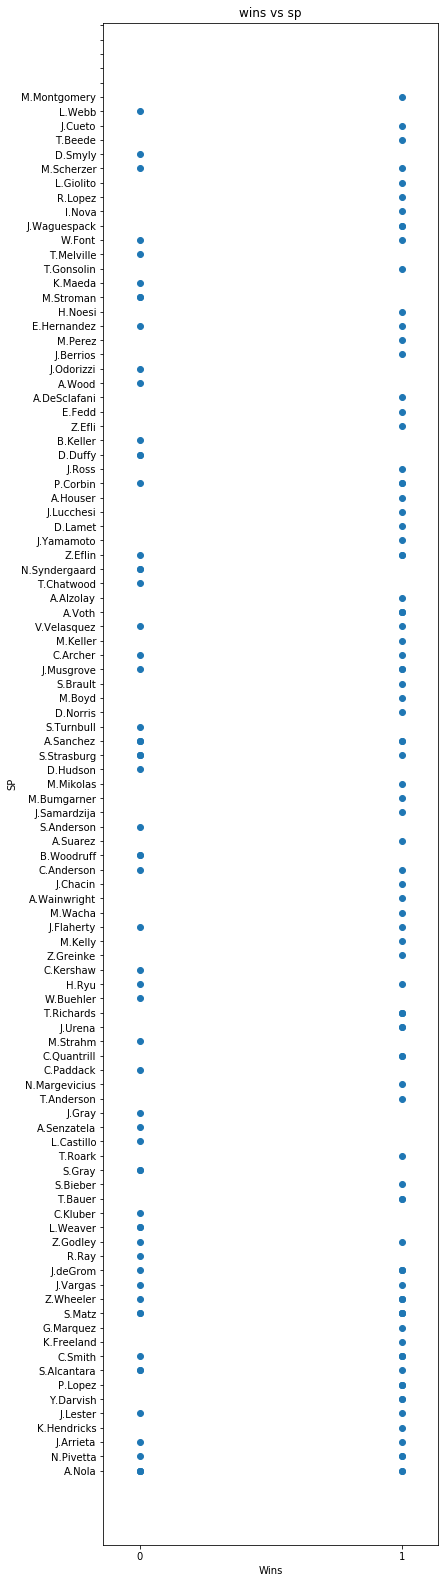

In [39]:
plt.rcParams["figure.figsize"]=6,28
plt.xticks(rotation=0)
plt.figsize=(30,6)
x_ticks = np.arange(0, 10, 1)
plt.xticks(x_ticks)
y_ticks = np.arange(0, 162, 1)
plt.yticks(y_ticks)
plt.scatter(data_df['Rslt'], data_df['Opp. Starter (GmeSc)'])
plt.title('wins vs sp')
plt.xlabel('Wins')
plt.ylabel('SP')
plt.show()

In [50]:
repeat_sp = data_df['Opp. Starter (GmeSc)'].value_counts()

In [92]:
repeat_sp.to_frame()


,Opp. Starter (GmeSc)
A.Nola,6
S.Matz,6
A.Sanchez,5
C.Smith,4
J.deGrom,4
...,...
C.Paddack,1
T.Chatwood,1
C.Kershaw,1
D.Hudson,1


In [93]:
repeat_sp.query('Opp. Starter (GmeSc) >1')

AttributeError: 'Series' object has no attribute 'query'

In [75]:
attributes = ['PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'IBB', 'SO', 'ROE', 'SB', 'BA', 'SLG', 'OPS',
       ]
data_attributes = data_df[attributes]

In [76]:
data_attributes.head()

,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,ROE,SB,BA,SLG,OPS
0,36,30,4,7,1,0,1,4,6,0,9,0,1,0.233,0.367,0.728
1,40,36,6,10,2,1,2,6,4,0,9,0,1,0.258,0.470,0.825
2,36,29,1,4,0,0,0,0,6,0,8,0,1,0.221,0.368,0.708
3,43,36,8,12,3,0,2,6,7,1,9,2,0,0.252,0.427,0.795
4,39,30,6,8,1,0,2,6,8,0,8,0,1,0.255,0.441,0.817


In [77]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

{2: [0.37323342067247944], 3: [0.25158437944456824], 4: [0.2511029214354295], 5: [0.19893119068801318], 6: [0.19278428412717505], 7: [0.1804111336283105], 8: [0.17022962011459652], 9: [0.16827329133893307], 10: [0.16196262889652646]}


Text(0.5, 1.0, 'Kmeans Clusters')

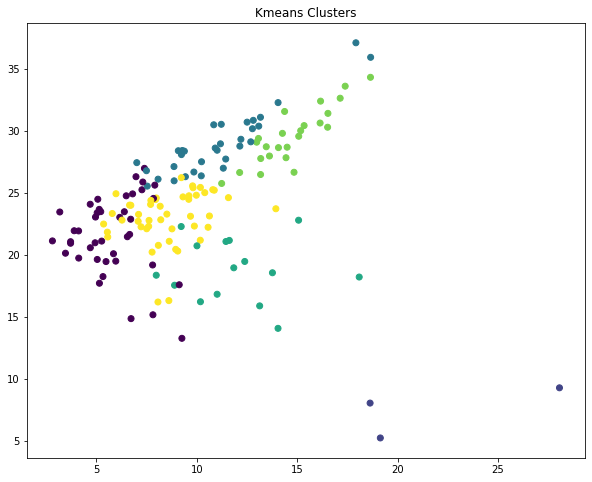

In [80]:
plt.rcParams["figure.figsize"]=10,8
kmeans_model = KMeans(n_clusters=6, random_state=1)
distances = kmeans_model.fit_transform(data_attributes)
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

In [83]:
data_df['labels'] = labels
attributes.append('labels')

# Print the first rows of `df`
data_df.head()

,Date,Opp,Rslt,PA,AB,R,H,2B,3B,HR,...,IBB,SO,ROE,SB,BA,SLG,OPS,Opp. Starter (GmeSc),hit_bins,labels
0,Mar,PHI,0,36,30,4,7,1,0,1,...,0,9,0,1,0.233,0.367,0.728,A.Nola,2,2
1,Mar,PHI,0,40,36,6,10,2,1,2,...,0,9,0,1,0.258,0.470,0.825,N.Pivetta,2,0
2,Mar,PHI,0,36,29,1,4,0,0,0,...,0,8,0,1,0.221,0.368,0.708,J.Arrieta,2,4
3,Apr,CHC,1,43,36,8,12,3,0,2,...,1,9,2,0,0.252,0.427,0.795,K.Hendricks,2,0
4,Apr,CHC,1,39,30,6,8,1,0,2,...,0,8,0,1,0.255,0.441,0.817,J.Lester,2,2


In [86]:
num_cols = ['PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'IBB', 'SO', 'ROE', 'SB', 'BA', 'SLG', 'OPS', 'labels', 'Rslt'
       ]
data=data_df[num_cols]

train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

x_train = train[attributes]
y_train = train['Rslt']
x_test = test[attributes]
y_test = test['Rslt']

In [87]:
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print `mae`
print(mae)

0.3632779874445833


In [89]:
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

0.3602327753278836
